<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9944 non-null   int64 
 1   ingredients  9944 non-null   object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


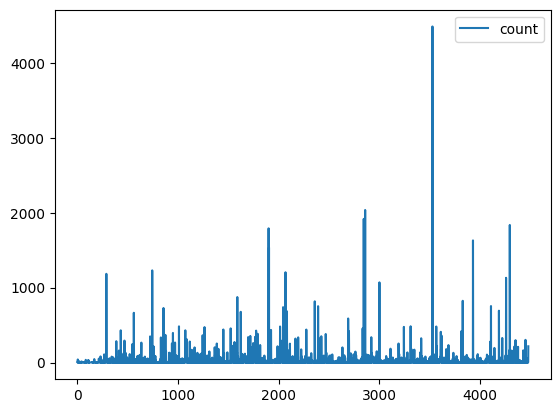

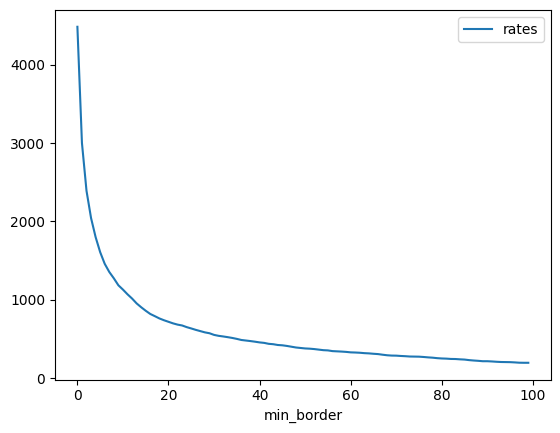

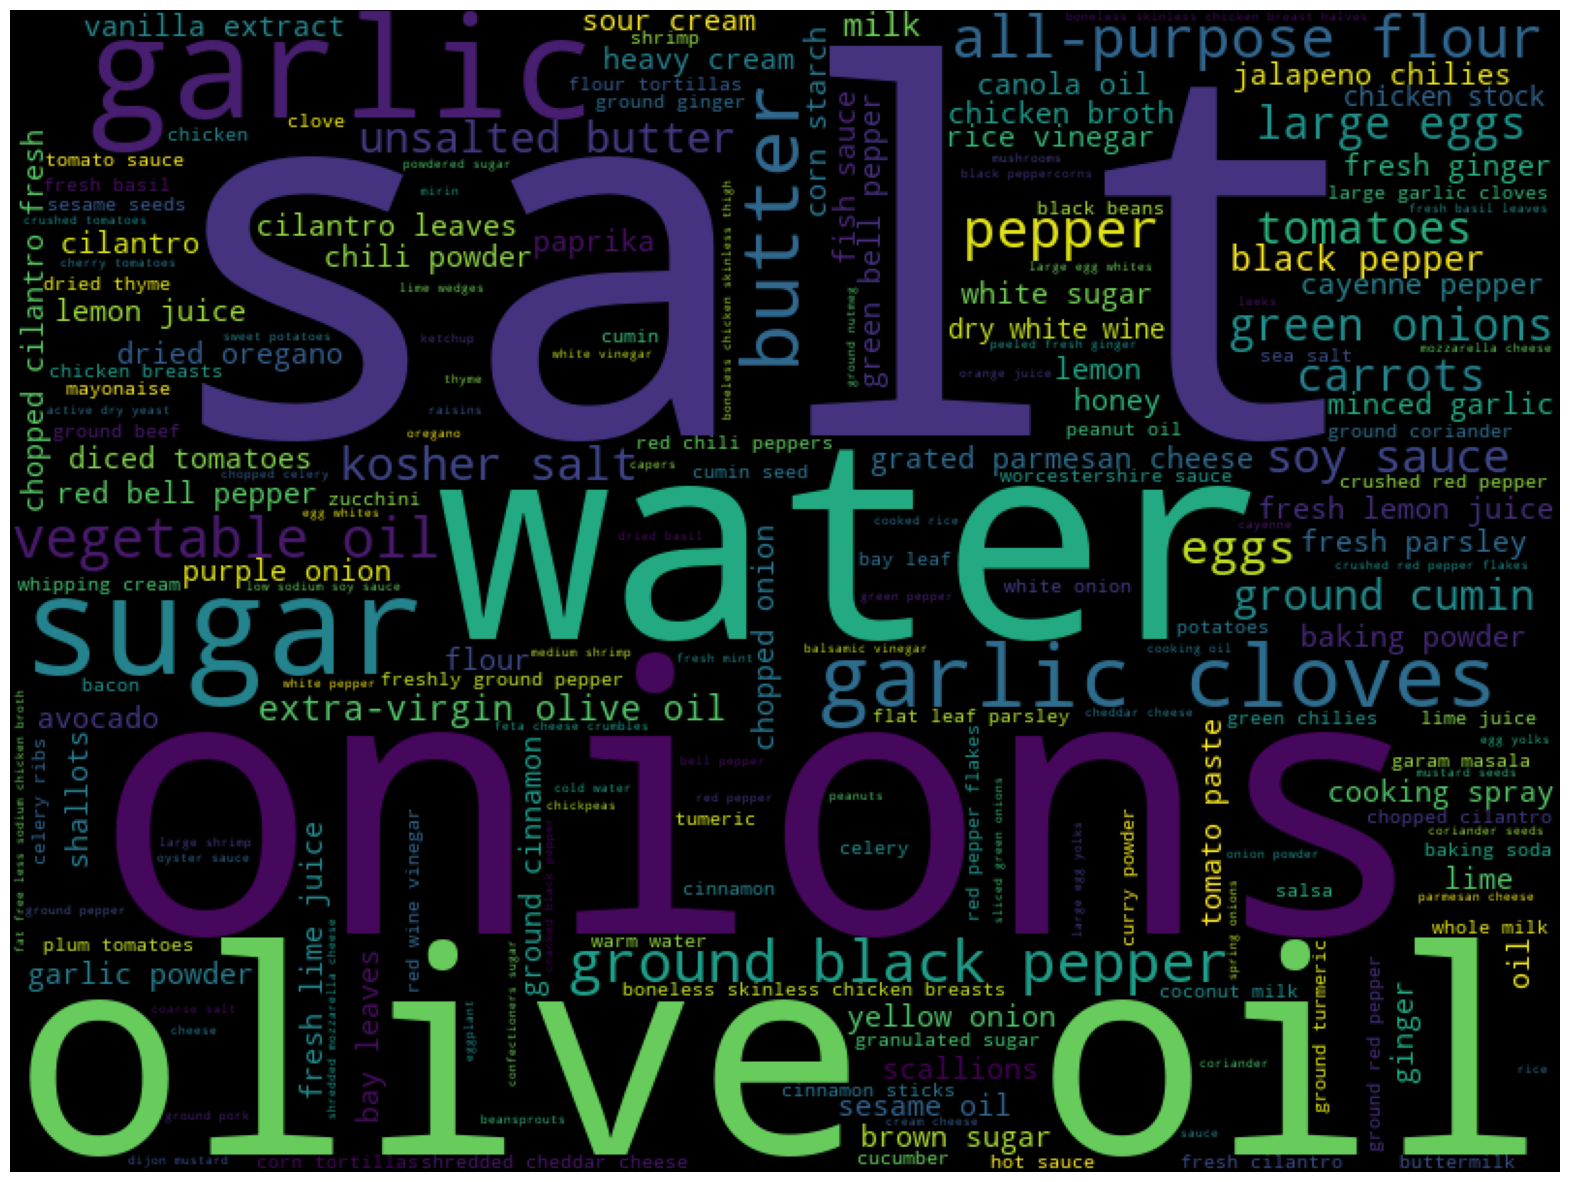

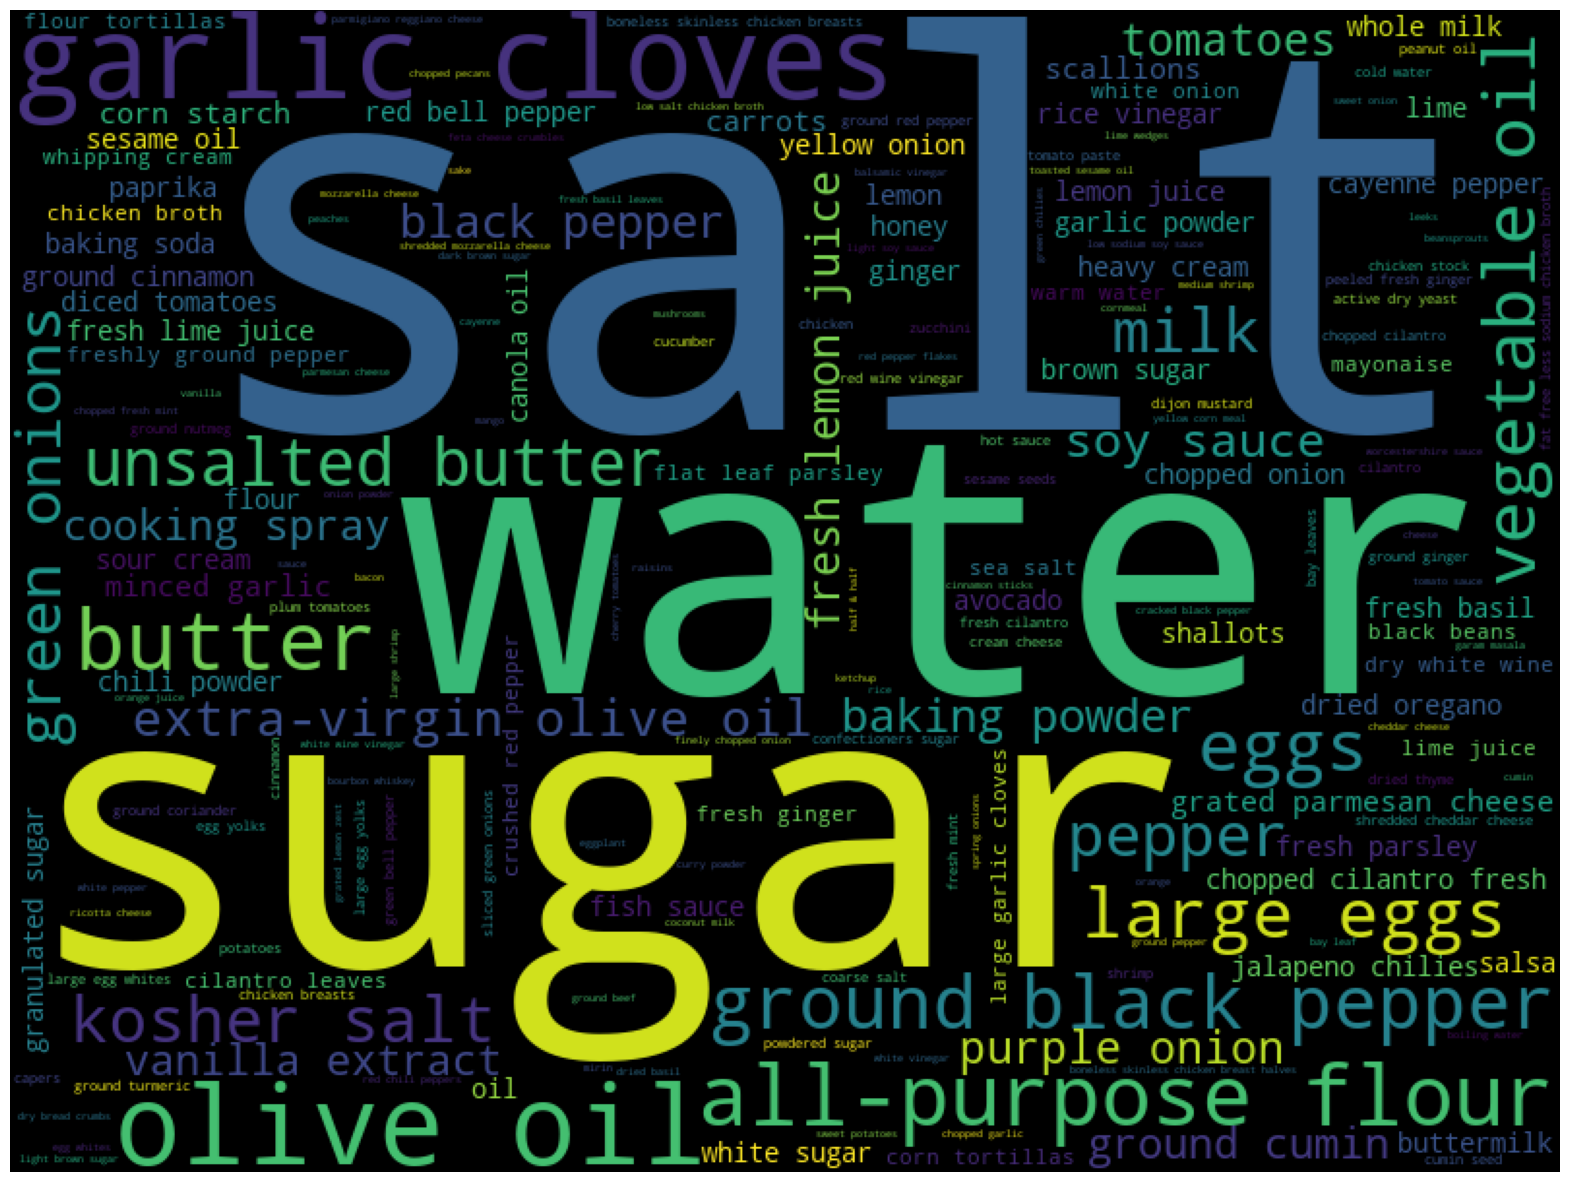

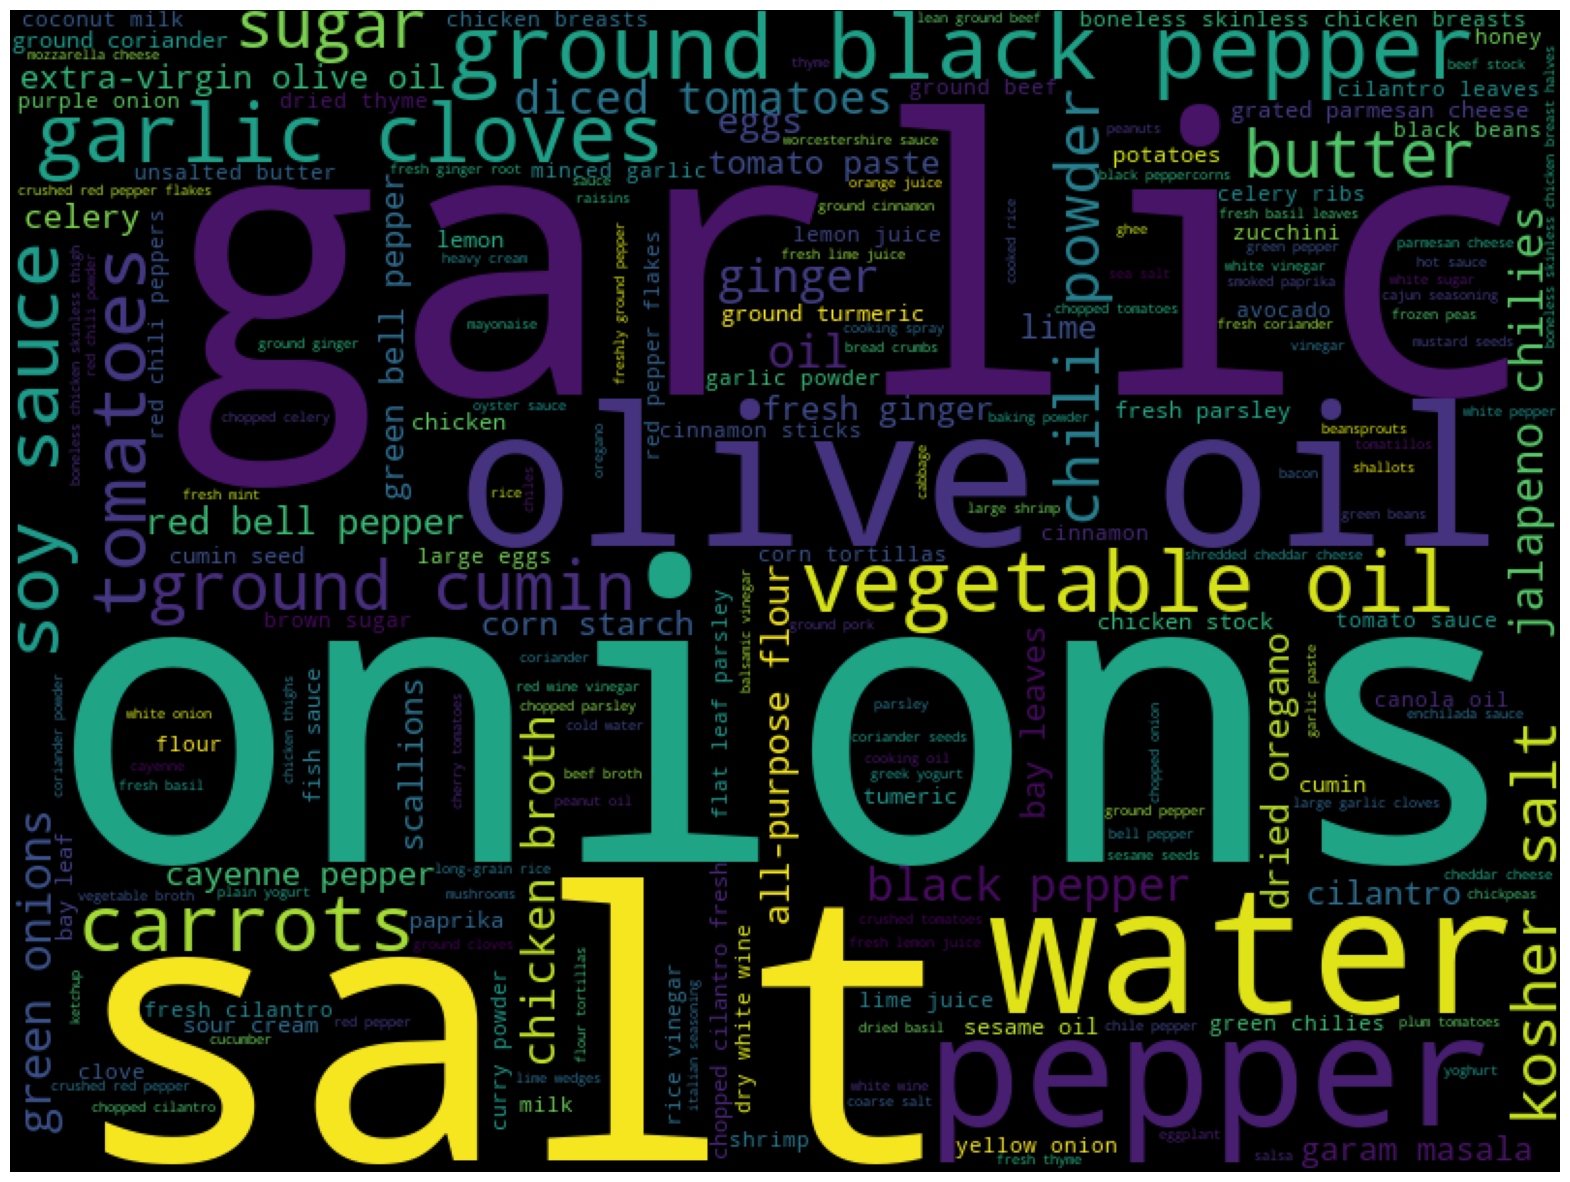

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

from matplotlib.pyplot import figure

## source https://www.kaggle.com/code/georgiyfedorov/recipes-clustering

# Load dataset
df = pd.read_json("./data/recipes.json")
df.head()

# 1. Data Analysis
df.info()


# Represent ingredients in a vectorized form
bag = CountVectorizer(analyzer=lambda x: x)
df = bag.fit_transform(df['ingredients'])

# Calculate the total frequency of ingredients
counts = pd.DataFrame({'ingredient': bag.get_feature_names_out(),
                       'count': df.toarray().sum(axis=0)})

# Visualize ingredient counts
counts.plot()

# Visualize the dataset shrinkage by increasing the minimum frequency threshold
decay = pd.DataFrame({'min_border': [x for x in range(100)], 'rates': [counts[counts['count']>x].shape[0] for x in range(100)]})
decay.plot(x='min_border', y='rates')

# Create the dataset with vectorized ingredients
df = pd.DataFrame(df.toarray(), columns=bag.get_feature_names_out())

# Visualize a word cloud
figure(figsize=(20, 18))
plt.axis('off')
plt.imshow(WordCloud(width=800, height=600).generate_from_frequencies(dict(zip(counts['ingredient'].to_list(), counts['count'].to_list()))))

# Display the 20 most popular ingredients
counts.sort_values('count', ascending=False).head(20)

# 2. Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, AffinityPropagation, Birch, MiniBatchKMeans, MeanShift
from sklearn.metrics import rand_score, adjusted_rand_score, silhouette_score

def n_bags(data):
    clusters = list(data['cluster'].unique())
    freqs = []
    for i in clusters:
        # Frequency of words in cluster i
        df = data[data['cluster'] == i].drop('cluster', axis=1).sum(axis=0)
        # Word cloud for each cluster
        figure(figsize=(20, 18))
        plt.axis('off')
        plt.imshow(WordCloud(width=800, height=600).generate_from_frequencies(df.to_dict()))
        freqs.append(df)
    
    return freqs    

# KMeans clustering with 2 clusters
df['cluster'] = KMeans(n_clusters=2).fit_predict(df)

# Cluster sizes
df[df['cluster'] == 0].shape[0], df[df['cluster'] == 1].shape[0]

# Examine the most frequent words in each cluster
kmeans2 = n_bags(df)

# Cluster 0
kmeans2[0].sort_values(ascending=False).head(15)

# Cluster 1
kmeans2[1].sort_values(ascending=False).head(15)

# Evaluate the clustering results (silhouette score and rand index)
silhouette_score(df.drop('cluster', axis=1), df['cluster'])


df['cluster'] = KMeans(n_clusters=20).fit_predict(df)
